In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Projects\\aaai\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.data_analysis.data_analyzer import DataAnalyzer as dan

from src.utils.context import Context
import sys

In [4]:
config_f_name = '2-TCR-128-32-0.2_GCN_OBS.jsonc'

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: c:\Projects\aaai\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc
,-1905306178 | INFO | 23040 - Executing: c:\Projects\aaai\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc Run: 1
,-1905306154 | INFO | 23040 - Creating the evaluation manager....................................
,-1905306135 | INFO | 23040 - Creating the paired  evaluators.....................................
,-1905306037 | INFO | 23040 - Loading: TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37
,-1905305912 | INFO | 23040 - Created: TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37
,-1905305896 | INFO | 23040 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
,-1905305885 | INFO | 23040 - Instantiating: torch.optim.RMSprop
,-1905305858 | INFO | 23040 - Instantiating: torch.nn.CrossEntropyLoss
,-1905305771 | INFO | 23040 - Loading: OracleTorch-f16f95a68a8f23c404f4684325d241af
,-1905305689 | INFO | 23040 - Created: OracleTorch-f16f95a68a8f23c404f4684325d241af
,-1905305681 | INFO | 23040 - Instantiating:

In [6]:
evaluator = eval_manager.evaluators[0]
evaluator

In [7]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
inst_cf_pairs

[(<src.dataset.instances.graph.GraphInstance at 0x23cfd822b80>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfd7172e0>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfd8372e0>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe842700>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfd837ac0>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe842af0>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfd83f0a0>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe8809a0>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfd83f640>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe880eb0>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfd8500a0>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe842a00>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfe830640>,
  <src.dataset.instances.graph.GraphInstance at 0x23cfe880040>),
 (<src.dataset.instances.graph.GraphInstance at 0x23cfe830880>,
  <src.dataset.instances.graph.Gr

In [8]:
og_inst = inst_cf_pairs[6][0]
cf_inst = inst_cf_pairs[6][1]

og_inst.id, cf_inst.id

(84, 84)

In [9]:
changes = dan.get_cf_changes(og_inst, cf_inst, False)
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(7, 28), (8, 29)]
removed_edges: []
added nodes: []
removed nodes: []


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
layout = nx.spring_layout
pos = layout(og_inst.get_nx())

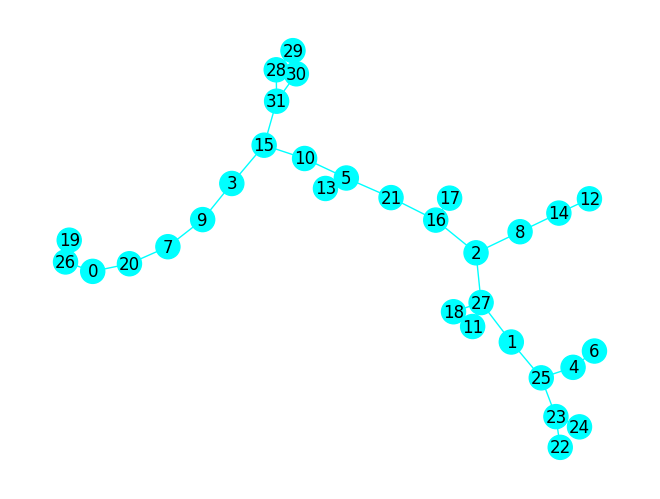

In [11]:
pos = dan.draw_graph(og_inst)

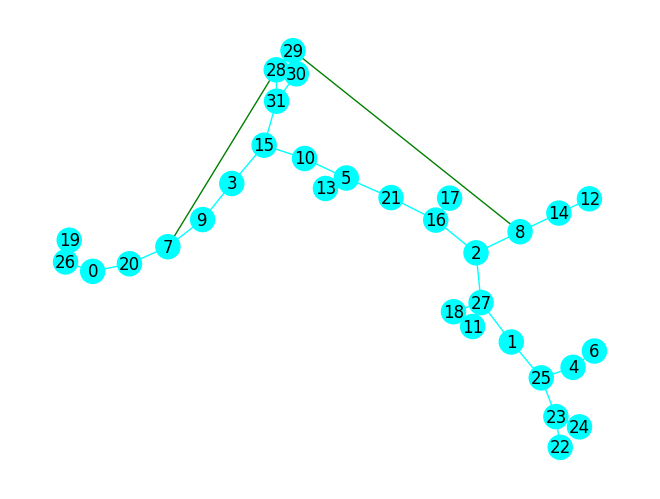

In [12]:
dan.draw_counterfactual_actions(og_inst, cf_inst, position=pos)
# dan.draw_counterfactual_actions(og_inst, cf_inst)